# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [17]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

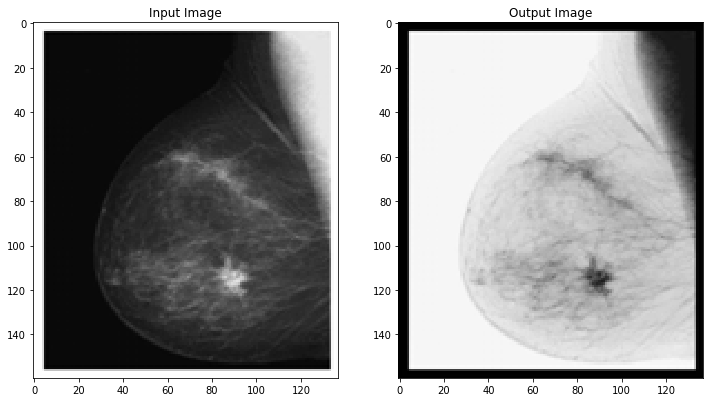

In [19]:
'''
1
Negative Transformation
'''
def negativeTransformation(img):
    img = rgb2gray(img)
    out_img = 255 - img
    show_images([img, out_img], ['Input Image', 'Output Image'])
    
img = io.imread('imgs/Picture1.png')
negativeTransformation(img)

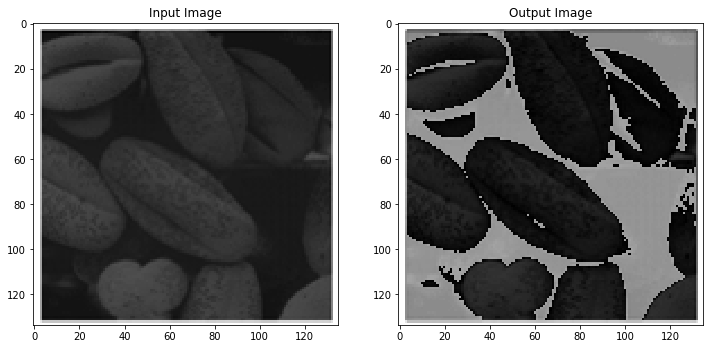

In [89]:
'''
2
Contrast Enhancement
'''

def contrastEnhancement(img):
    img = rgb2gray(img) * 255
    out_img = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j]<=100):
                out_img[i][j]= 1.5*img[i][j] + 50
            else:
                out_img[i][j] = img[i][j]
    show_images([img, out_img], ['Input Image', 'Output Image'])
    
img = io.imread('imgs/Picture2.png')
contrastEnhancement(img)

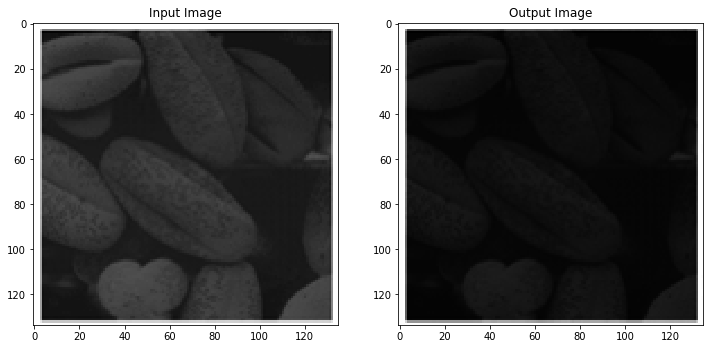

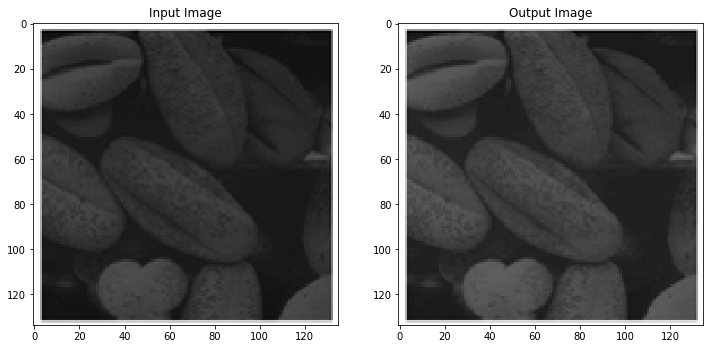

In [26]:
'''
3
Gamma Correction
'''

def gammaCorrection(img, c, alpha):
    img = rgb2gray(img) * 255
    out_img = np.zeros((img.shape[0],img.shape[1]))
    
    out_img = c * np.power(img, alpha)
    show_images([img, out_img], ['Input Image', 'Output Image'])
    
img = io.imread('imgs/Picture2.png')
gammaCorrection(img, 1, 3)
gammaCorrection(img, 1, 0.5)


As alpha increases the brightness decreases and vice versa

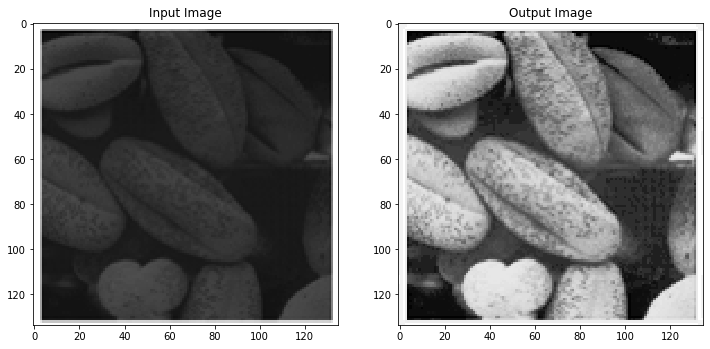

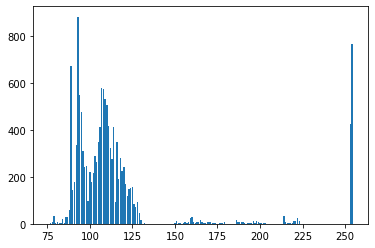

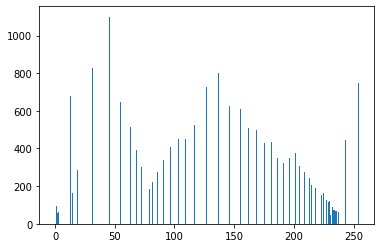

In [84]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass



img = io.imread('imgs/Picture2.png')
img = rgb2gray(img) * 255

max_gray = np.max(img)
freq = np.zeros((1,int(max_gray)+1))[0]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        freq[int(img[i][j])]+=1
         
freq/=(img.shape[0]*img.shape[1])

freq = np.cumsum(freq)

freq *= (max_gray)

np.around(freq, decimals=1)

freq= np.round_(freq)

out_img = np.zeros(img.shape)


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        out_img[i][j]=freq[int(img[i][j])]

show_images([img, out_img], ['Input Image', 'Output Image'])
showHist(img)
showHist(out_img)